In [1]:
#Setting working path required for relative package loading

import os
os.chdir("/home/tales/ds/walmart-recruiting-store-sales-forecasting/")
print("working dir:", "\'" + os.getcwd() + "\'")

working dir: '/home/tales/ds/walmart-recruiting-store-sales-forecasting'


In [2]:
import pandas as pd

from src.data import dao
from src.processment import process
from src.ml import evaluation
from src.utils import pretties, time_utils, stats
from src.visualization import plot
from bokeh.plotting import show, output_notebook

In [3]:
pretties.max_data_frame_columns()
pretties.decimal_notation()
output_notebook()


Loading BokehJS ...

# <font color="darkred">EVALUATION</font>

# walmart-recruiting-store-sales-forecasting
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

<div class="markdown-converter__text--rendered"><p>This competition is evaluated on the weighted mean absolute error (WMAE):</p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mtext>WMAE</mtext></mrow><mo>=</mo><mfrac><mn>1</mn><mrow><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>w</mi><mi>i</mi></msub></mrow></mrow></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><msub><mi>w</mi><mi>i</mi></msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><msub><mi>y</mi><mi>i</mi></msub><mo>&amp;#x2212;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>y</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mi>i</mi></msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 16.159em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.815em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(0.796em, 1012.7em, 3.971em, -999.997em); top: -2.548em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="texatom" id="MathJax-Span-3"><span class="mrow" id="MathJax-Span-4"><span class="mtext" id="MathJax-Span-5" style="font-family: STIXGeneral;">WMAE</span></span></span><span class="mo" id="MathJax-Span-6" style="font-family: STIXGeneral; padding-left: 0.343em;">=</span><span class="mfrac" id="MathJax-Span-7" style="padding-left: 0.343em;"><span style="display: inline-block; position: relative; width: 2.157em; height: 0px; margin-right: 0.116em; margin-left: 0.116em;"><span style="position: absolute; clip: rect(3.177em, 1000.4em, 4.198em, -999.997em); top: -4.702em; left: 50%; margin-left: -0.224em;"><span class="mn" id="MathJax-Span-8" style="font-family: STIXGeneral;">1</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(3.121em, 1002.04em, 4.481em, -999.997em); top: -3.285em; left: 50%; margin-left: -1.018em;"><span class="mrow" id="MathJax-Span-9"><span class="mo" id="MathJax-Span-10" style="font-family: STIXGeneral; vertical-align: 0.003em;">∑</span><span class="texatom" id="MathJax-Span-11" style="padding-left: 0.173em;"><span class="mrow" id="MathJax-Span-12"><span class="msubsup" id="MathJax-Span-13"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.63em, 4.198em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-14" style="font-family: STIXGeneral; font-style: italic;">w</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.683em;"><span class="mi" id="MathJax-Span-15" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(0.853em, 1002.16em, 1.25em, -999.997em); top: -1.301em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.157em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.08em;"></span></span></span></span><span class="munderover" id="MathJax-Span-16" style="padding-left: 0.173em;"><span style="display: inline-block; position: relative; width: 1.307em; height: 0px;"><span style="position: absolute; clip: rect(2.894em, 1001.19em, 4.651em, -999.997em); top: -4.022em; left: 0em;"><span class="mo" id="MathJax-Span-17" style="font-family: STIXSizeOneSym; vertical-align: -0.507em;">∑</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(3.404em, 1000.97em, 4.311em, -999.997em); top: -2.888em; left: 0.116em;"><span class="texatom" id="MathJax-Span-18"><span class="mrow" id="MathJax-Span-19"><span class="mi" id="MathJax-Span-20" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span class="mo" id="MathJax-Span-21" style="font-size: 70.7%; font-family: STIXGeneral;">=</span><span class="mn" id="MathJax-Span-22" style="font-size: 70.7%; font-family: STIXGeneral;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(3.461em, 1000.34em, 4.198em, -999.997em); top: -5.213em; left: 0.456em;"><span class="mi" id="MathJax-Span-23" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">n</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-24" style="padding-left: 0.173em;"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.63em, 4.198em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-25" style="font-family: STIXGeneral; font-style: italic;">w</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.683em;"><span class="mi" id="MathJax-Span-26" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="texatom" id="MathJax-Span-27"><span class="mrow" id="MathJax-Span-28"><span class="mo" id="MathJax-Span-29" style="font-family: STIXVariants;">|</span></span></span><span class="msubsup" id="MathJax-Span-30"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-31" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.456em;"><span class="mi" id="MathJax-Span-32" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="mo" id="MathJax-Span-33" style="font-family: STIXGeneral; padding-left: 0.23em;">−</span><span class="msubsup" id="MathJax-Span-34" style="padding-left: 0.23em;"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.121em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="texatom" id="MathJax-Span-35"><span class="mrow" id="MathJax-Span-36"><span class="munderover" id="MathJax-Span-37"><span style="display: inline-block; position: relative; width: 0.456em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-38" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -4.079em; left: 0.06em;"><span style="height: 0em; vertical-align: 0em; width: 0.4em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-39" style="font-family: STIXGeneral;">̂&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.224em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.795em; left: 0.456em;"><span class="mi" id="MathJax-Span-40" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="texatom" id="MathJax-Span-41"><span class="mrow" id="MathJax-Span-42"><span class="mo" id="MathJax-Span-43" style="font-family: STIXVariants;">|</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.554em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.639em; border-left: 0px solid; width: 0px; height: 3.789em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mrow class="MJX-TeXAtom-ORD"><mtext>WMAE</mtext></mrow><mo>=</mo><mfrac><mn>1</mn><mrow><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><msub><mi>w</mi><mi>i</mi></msub></mrow></mrow></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><msub><mi>w</mi><mi>i</mi></msub><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><msub><mrow class="MJX-TeXAtom-ORD"><mover><mi>y</mi><mo stretchy="false">^</mo></mover></mrow><mi>i</mi></msub><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-1"> \textrm{WMAE} = \frac{1}{\sum{w_i}} \sum_{i=1}^n w_i | y_i - \hat{y}_i | </script></p>
<p>where</p>
<ul>
<li>n is the number of rows</li>
<li><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>y</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-44" style="width: 0.967em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(1.307em, 1000.74em, 2.611em, -999.997em); top: -2.208em; left: 0em;"><span class="mrow" id="MathJax-Span-45"><span class="msubsup" id="MathJax-Span-46"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.121em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="texatom" id="MathJax-Span-47"><span class="mrow" id="MathJax-Span-48"><span class="munderover" id="MathJax-Span-49"><span style="display: inline-block; position: relative; width: 0.456em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-50" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -4.079em; left: 0.06em;"><span style="height: 0em; vertical-align: 0em; width: 0.4em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-51" style="font-family: STIXGeneral;">̂&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.224em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.795em; left: 0.456em;"><span class="mi" id="MathJax-Span-52" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.214em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.432em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mrow class="MJX-TeXAtom-ORD"><mover><mi>y</mi><mo stretchy="false">^</mo></mover></mrow><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-2"> \hat{y}_i </script> is the predicted sales</li>
<li><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>y</mi><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-53" style="width: 0.967em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(1.59em, 1000.74em, 2.611em, -999.997em); top: -2.208em; left: 0em;"><span class="mrow" id="MathJax-Span-54"><span class="msubsup" id="MathJax-Span-55"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-56" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.456em;"><span class="mi" id="MathJax-Span-57" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.214em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>y</mi><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-3"> y_i </script> is the actual sales</li>
<li><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>w</mi><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-58" style="width: 1.25em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(1.59em, 1000.97em, 2.554em, -999.997em); top: -2.208em; left: 0em;"><span class="mrow" id="MathJax-Span-59"><span class="msubsup" id="MathJax-Span-60"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.63em, 4.198em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-61" style="font-family: STIXGeneral; font-style: italic;">w</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.683em;"><span class="mi" id="MathJax-Span-62" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.214em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>w</mi><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-4"> w_i </script> are weights. w = 5 if the week is a holiday week, 1 otherwise</li>
</ul>
<h2>Submission File</h2>
<p>For each row in the test set (store + department + date triplet), you should predict the weekly sales of that department. The Id column is formed by concatenating the Store, Dept, and Date with underscores (e.g. Store_Dept_2012-11-02). &nbsp;The file should have a header and looks like the following:</p>
<pre>Id,Weekly_Sales
1_1_2012-11-02,0<br>1_1_2012-11-09,0<br>1_1_2012-11-16,0
...
</pre></div>

In [4]:
train = dao.load_dataset("train")
train = train.groupby("store_dept").apply(process.train_sales_semantic_enrichment)

test = dao.load_dataset("test")

feat = dao.load_features()
feat = process.features_semantic_enrichment(feat)

stores = dao.load_stores()

In [5]:
train = train.merge(feat, how="left", left_on=["Store", "Date"], right_on=["Store", "Date"], suffixes=["", "_y"])
del train["IsHoliday_y"]
del train["timestamp_y"]
train = train.merge(stores, how="left", left_on=["Store"], right_on=["Store"])

In [6]:
test = test.merge(feat, how="left", left_on=["Store", "Date"], right_on=["Store", "Date"], suffixes=["", "_y"])
del test["IsHoliday_y"]
del test["timestamp_y"]
test = test.merge(stores, how="left", left_on=["Store"], right_on=["Store"])

In [7]:
cols = ['Date', 'Store', 'Dept', 'Weekly_Sales', 'pre_holiday', 'IsHoliday', 'pos_holiday', 'Fuel_Price', 
        'CPI', 'Unemployment', 'celsius', 'datetime', 'Type', 'sales_diff', 'sales_diff_p',
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
        'Size', 'Temperature', 'timestamp', 'store_dept', "day_n", "week_n", "month_n", "wm_date", "up_diff", "celsius_diff", "year"]

train = train[cols]

In [8]:
print(len(train))
train.head()

421570


,Date,Store,Dept,Weekly_Sales,pre_holiday,IsHoliday,pos_holiday,Fuel_Price,CPI,Unemployment,celsius,datetime,Type,sales_diff,sales_diff_p,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,timestamp,store_dept,day_n,week_n,month_n,wm_date,up_diff,celsius_diff,year
0,2010-02-05,1,1,24924.50,True,False,NaN,2.57,211.10,8.11,5.73,2010-02-05,A,nan,nan,nan,nan,nan,nan,nan,151315,42.31,1265338800.00,1_1,5,1,02,02/1,True,nan,2010
1,2010-02-05,29,5,15552.08,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_5,5,1,02,02/1,True,nan,2010
2,2010-02-05,29,6,3200.22,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_6,5,1,02,02/1,True,nan,2010
3,2010-02-05,29,7,10820.05,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_7,5,1,02,02/1,True,nan,2010
4,2010-02-05,29,8,20055.64,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_8,5,1,02,02/1,True,nan,2010


In [9]:
train["Date"].head(1).append(train["Date"].tail(1))

0         2010-02-05
421569    2012-10-26
Name: Date, dtype: object

In [10]:
def time_interval_months(time_serie, str_format="%Y-%m-%d"):
    delta_h = time_utils.delta_time_hour(time_serie.tolist()[0], 
                                         time_serie.tolist()[-1], 
                                         str_format)
    return delta_h / ((24*365)/12)

In [11]:
print("Time interval (months): {}".format(time_interval_months(train["Date"])))
print("Time interval (years) : {}".format(time_interval_months(train["Date"]) / 12))

Time interval (months): 32.679452054794524
Time interval (years) : 2.723287671232877


# Train & Validation
partitions

In [12]:
timestamp_limit = time_utils.str_datetime_to_timestamp("2012-02-01", "%Y-%m-%d")

In [13]:
use_train = train[train["timestamp"] <= timestamp_limit]
use_valid = train[train["timestamp"] > timestamp_limit]

In [14]:
pretties.display_md("#### Train")
use_train["Date"].head(1).append(use_train["Date"].tail(1))

#### Train

0         2010-02-05
305981    2012-01-27
Name: Date, dtype: object

In [15]:
pretties.display_md("#### Validation")
use_valid["Date"].head(1).append(use_valid["Date"].tail(1))

#### Validation

305982    2012-02-03
421569    2012-10-26
Name: Date, dtype: object

In [16]:
print("TRAIN Time interval (months): {}".format(time_interval_months(use_train["Date"])))
print("VALID Time interval (months): {}".format(time_interval_months(use_valid["Date"])))

TRAIN Time interval (months): 23.704109589041096
VALID Time interval (months): 8.745205479452055


# Forecasting

### <font color="magenta">Baseline Week-Month</font>

In [17]:
key_colnames = ["Store", "Dept", "Date"]

In [18]:
len(train.drop_duplicates(["wm_date", "store_dept"]))

170730

In [19]:
def wm_data(data):
    transformed_data = []

    for (store_dept, wm_date), g in data.groupby(["store_dept", "wm_date"]):
        sorted_group = g[["year", "Weekly_Sales", "Size", "Store", "Dept", "Date", "IsHoliday",
                          "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5",
                          "Fuel_Price", "CPI", "Unemployment", "week_n"]].sort_values("year")

        store = sorted_group["Store"].iloc[0]
        dept = sorted_group["Dept"].iloc[0]
        date = sorted_group["Date"].iloc[0]
        #         is_holiday = sorted_group["IsHoliday"].iloc[0]

        transformed_data_row = {"store_dept": store_dept, "wm_date": wm_date,
                              "Store": store, "Dept": dept, "Date": date}

        for year_i in range(len(sorted_group)):
            year_n_label = "year" + str(year_i)
            year_n_sales_label = year_n_label + "_sales"
            size_n_label = year_n_label + "_size"
            isholiday_n_label = year_n_label + "_isholiday"
            fuel_price_n_label = year_n_label + "_fuel_price"
            cpi_n_label = year_n_label + "_cpi"
            unempl_n_label = year_n_label + "_unempl"
            week_n_n_label = year_n_label + "_week_n"
            md1_n_label = year_n_label + "_md1"
            md2_n_label = year_n_label + "_md2"
            md3_n_label = year_n_label + "_md3"
            md4_n_label = year_n_label + "_md4"
            md5_n_label = year_n_label + "_md5"

            year_value = sorted_group.iloc[year_i]["year"] - 2010
            x_value = sorted_group.iloc[year_i]["Weekly_Sales"]
            size_value = sorted_group.iloc[year_i]["Size"]
            isholiday_value = sorted_group.iloc[year_i]["IsHoliday"]
            fuel_price_value = sorted_group.iloc[year_i]["Fuel_Price"]
            cpi_value = sorted_group.iloc[year_i]["CPI"]
            unempl_value = sorted_group.iloc[year_i]["Unemployment"]
            week_n_value = sorted_group.iloc[year_i]["week_n"]
            md1_value = sorted_group.iloc[year_i]["MarkDown1"]
            md2_value = sorted_group.iloc[year_i]["MarkDown2"]
            md3_value = sorted_group.iloc[year_i]["MarkDown3"]
            md4_value = sorted_group.iloc[year_i]["MarkDown4"]
            md5_value = sorted_group.iloc[year_i]["MarkDown5"]

            transformed_data_row[year_n_label] = year_value
            transformed_data_row[year_n_sales_label] = x_value
            transformed_data_row[size_n_label] = size_value
            transformed_data_row[isholiday_n_label] = isholiday_value
            transformed_data_row[fuel_price_n_label] = fuel_price_value
            transformed_data_row[cpi_n_label] = cpi_value
            transformed_data_row[unempl_n_label] = unempl_value
            transformed_data_row[week_n_n_label] = week_n_value
            transformed_data_row[md1_n_label] = md1_value
            transformed_data_row[md2_n_label] = md2_value
            transformed_data_row[md3_n_label] = md3_value
            transformed_data_row[md4_n_label] = md4_value
            transformed_data_row[md5_n_label] = md5_value

        transformed_data.append(transformed_data_row)

    return pd.DataFrame(transformed_data)

def format_wm_data_colnames(data, dataset_name):
    print("Total groups: ", len(data.drop_duplicates(["wm_date", "store_dept"])))
    print(len(data))
    data = data.rename({"Store": "Store" + "_" + dataset_name,
                        "Dept": "Dept" + "_" + dataset_name,
                        "Date": "Date" + "_" + dataset_name,

                        "year0": "year0" + "_" + dataset_name,
                        "year0_sales": "year0_sales" + "_" + dataset_name,
                        "year0_size": "year0_size" + "_" + dataset_name,
                        "year0_isholiday": "year0_isholiday" + "_" + dataset_name,
                        "year0_fuel_price": "year0_fuel_price" + "_" + dataset_name,
                        "year0_cpi": "year0_cpi" + "_" + dataset_name,
                        "year0_unempl": "year0_unempl" + "_" + dataset_name,
                        "year0_week_n": "year0_week_n" + "_" + dataset_name,
                        "year0_md1": "year0_md1" + "_" + dataset_name,
                        "year0_md2": "year0_md2" + "_" + dataset_name,
                        "year0_md3": "year0_md3" + "_" + dataset_name,
                        "year0_md4": "year0_md4" + "_" + dataset_name,
                        "year0_md5": "year0_md5" + "_" + dataset_name,

                        "year1": "year1" + "_" + dataset_name,
                        "year1_sales": "year1_sales" + "_" + dataset_name,
                        "year1_size": "year1_size" + "_" + dataset_name,
                        "year1_isholiday": "year1_isholiday" + "_" + dataset_name,
                        "year1_fuel_price": "year1_fuel_price" + "_" + dataset_name,
                        "year1_cpi": "year1_cpi" + "_" + dataset_name,
                        "year1_unempl": "year1_unempl" + "_" + dataset_name,
                        "year1_week_n": "year1_week_n" + "_" + dataset_name,
                        "year1_md1": "year1_md1" + "_" + dataset_name,
                        "year1_md2": "year1_md2" + "_" + dataset_name,
                        "year1_md3": "year1_md3" + "_" + dataset_name,
                        "year1_md4": "year1_md4" + "_" + dataset_name,
                        "year1_md5": "year1_md5" + "_" + dataset_name}, axis=1)

    return data

In [20]:
print(len(use_train), len(use_valid))

305982 115588


In [21]:
dummy_train_filepath = "data/ml_datasets/wm_data_train.csv"

try:
    dummy_train = pd.read_csv(dummy_train_filepath, sep=";")
except FileNotFoundError:
    dummy_train = wm_data(use_train)
    dummy_train.to_csv(dummy_train_filepath, sep=";", index=False)

In [22]:
dummy_train = process.format_wm_data_colnames(dummy_train, "train")

Total groups:  159752
159752


In [23]:
dummy_valid_filepath = "data/ml_datasets/wm_data_valid.csv"

try:
    dummy_valid = pd.read_csv(dummy_valid_filepath, sep=";")
except FileNotFoundError:
    dummy_valid = wm_data(use_valid)
    dummy_valid.to_csv(dummy_valid_filepath, sep=";", index=False)

In [24]:
dummy_valid = process.format_wm_data_colnames(dummy_valid, "valid")

Total groups:  115588
115588


#### Linear Regression on Week-Month grouped data

plotting

In [25]:
xy = pd.merge(dummy_train, dummy_valid, 
              left_on=["wm_date", "store_dept"], right_on=["wm_date", "store_dept"], 
              how="right", suffixes=["_train", "_valid"])

print("Total groups: ", len(xy.drop_duplicates(["wm_date", "store_dept"])))
print(len(xy))
xy["Store"] = xy["Store_train"]
xy["Dept"] = xy["Dept_train"]
xy["Date"] = xy["Date_train"]
# xy["IsHoliday"] = xy["year0_isholiday_valid"]
# xy["Weekly_Sales"] = xy["year0_sales_valid"]

xy.sample(6)

Total groups:  115588
115588


,store_dept,wm_date,Store_train,Dept_train,Date_train,year0_train,year0_sales_train,year0_size_train,year0_isholiday_train,year0_fuel_price_train,year0_cpi_train,year0_unempl_train,year0_week_n_train,year0_md1_train,year0_md2_train,year0_md3_train,year0_md4_train,year0_md5_train,year1_train,year1_sales_train,year1_size_train,year1_isholiday_train,year1_fuel_price_train,year1_cpi_train,year1_unempl_train,year1_week_n_train,year1_md1_train,year1_md2_train,year1_md3_train,year1_md4_train,year1_md5_train,Store_valid,Dept_valid,Date_valid,year0_valid,year0_sales_valid,year0_size_valid,year0_isholiday_valid,year0_fuel_price_valid,year0_cpi_valid,year0_unempl_valid,year0_week_n_valid,year0_md1_valid,year0_md2_valid,year0_md3_valid,year0_md4_valid,year0_md5_valid,Store,Dept,Date
15955,16_33,03/3,16.00,33.00,2010-03-19,0.00,2780.05,57197.00,False,2.69,189.73,7.04,3.00,nan,nan,nan,nan,nan,1.00,3495.78,57197.00,False,3.41,192.12,6.61,3.00,nan,nan,nan,nan,nan,16,33,2012-03-16,2,3702.60,57197,False,3.49,197.05,6.16,3,3501.15,0.30,1.33,1396.55,1515.46,16.00,33.00,2010-03-19
104143,9_74,06/3,9.00,74.00,2010-06-18,0.00,6831.60,125833.00,False,2.64,215.02,6.38,3.00,nan,nan,nan,nan,nan,1.00,6191.97,125833.00,False,3.64,218.59,6.38,3.00,nan,nan,nan,nan,nan,9,74,2012-06-15,2,8542.65,125833,False,3.39,225.51,5.54,3,3296.23,176.40,50.03,780.78,4209.82,9.00,74.00,2010-06-18
98074,7_26,02/4,7.00,26.00,2010-02-26,0.00,2140.73,70713.00,False,2.59,189.60,9.01,4.00,nan,nan,nan,nan,nan,1.00,2221.03,70713.00,False,3.10,191.96,8.82,4.00,nan,nan,nan,nan,nan,7,26,2012-02-24,2,2494.75,70713,False,3.13,196.95,8.26,4,10170.57,4331.71,93.06,2699.15,3456.70,7.00,26.00,2010-02-26
111823,37_49,09/3,nan,nan,NaN,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,37,49,2012-09-21,2,10.94,39910,False,3.72,221.46,6.62,3,241.47,nan,nan,nan,2143.91,nan,nan,NaN
77287,3_81,08/3,3.00,81.00,2010-08-20,0.00,859.50,37392.00,False,2.66,214.93,7.35,3.00,nan,nan,nan,nan,nan,1.00,1374.01,37392.00,False,3.55,219.02,7.57,3.00,nan,nan,nan,nan,nan,3,81,2012-08-17,2,1847.57,37392,False,3.57,225.56,6.33,3,990.08,44.20,nan,401.46,430.69,3.00,81.00,2010-08-20
2660,11_11,10/2,11.00,11.00,2010-10-08,0.00,16316.14,207499.00,False,2.63,215.06,7.56,2.00,nan,nan,nan,nan,nan,1.00,14090.07,207499.00,False,3.27,220.75,7.20,2.00,nan,nan,nan,nan,nan,11,11,2012-10-12,2,14073.90,207499,False,3.60,226.92,6.03,2,2345.03,nan,22.95,271.93,13035.68,11.00,11.00,2010-10-08


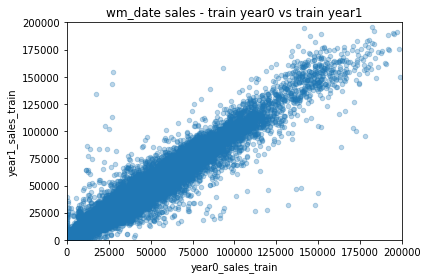

In [26]:
%matplotlib inline
xy.plot.scatter("year0_sales_train", "year1_sales_train", title="wm_date sales - train year0 vs train year1", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

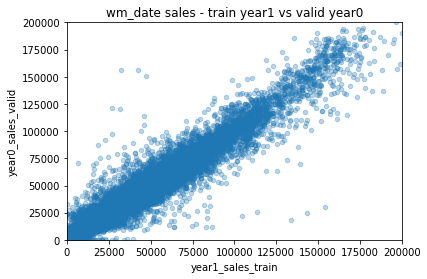

In [27]:
%matplotlib inline
xy.plot.scatter("year1_sales_train", "year0_sales_valid", title="wm_date sales - train year1 vs valid year0", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

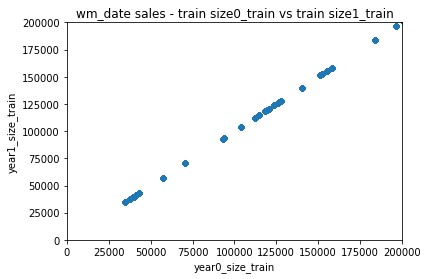

In [28]:
%matplotlib inline
xy.plot.scatter("year0_size_train", "year1_size_train", title="wm_date sales - train size0_train vs train size1_train", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

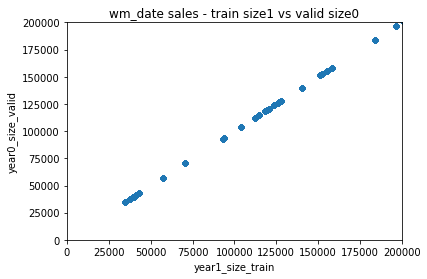

In [29]:
%matplotlib inline
xy.plot.scatter("year1_size_train", "year0_size_valid", title="wm_date sales - train size1 vs valid size0", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

NaN values

In [31]:
stats.freq(xy["year0_sales_train"].isna())

,freq_absolute,freq_relative
False,104610,90.50%
True,10978,9.50%


In [32]:
not_na_xy = xy[(xy["year0_sales_train"].notna()) & (xy["year1_sales_train"].notna())]

In [33]:
x = not_na_xy
x.head(4)

,store_dept,wm_date,Store_train,Dept_train,Date_train,year0_train,year0_sales_train,year0_size_train,year0_isholiday_train,year0_fuel_price_train,year0_cpi_train,year0_unempl_train,year0_week_n_train,year0_md1_train,year0_md2_train,year0_md3_train,year0_md4_train,year0_md5_train,year1_train,year1_sales_train,year1_size_train,year1_isholiday_train,year1_fuel_price_train,year1_cpi_train,year1_unempl_train,year1_week_n_train,year1_md1_train,year1_md2_train,year1_md3_train,year1_md4_train,year1_md5_train,Store_valid,Dept_valid,Date_valid,year0_valid,year0_sales_valid,year0_size_valid,year0_isholiday_valid,year0_fuel_price_valid,year0_cpi_valid,year0_unempl_valid,year0_week_n_valid,year0_md1_valid,year0_md2_valid,year0_md3_valid,year0_md4_valid,year0_md5_valid,Store,Dept,Date
0,10_1,02/1,10.00,1.00,2010-02-05,0.00,40212.84,126512.00,False,2.96,126.44,9.77,1.00,nan,nan,nan,nan,nan,1.00,36145.83,126512.00,False,3.35,127.72,8.74,1.00,nan,nan,nan,nan,nan,10,1,2012-02-03,2,36444.00,126512,False,3.54,130.35,7.54,1,42468.40,1985.73,174.33,33345.34,5609.77,10.00,1.00,2010-02-05
1,10_1,02/2,10.00,1.00,2010-02-12,0.00,67699.32,126512.00,True,2.83,126.50,9.77,2.00,nan,nan,nan,nan,nan,1.00,52118.42,126512.00,True,3.38,127.86,8.74,2.00,nan,nan,nan,nan,nan,10,1,2012-02-10,2,50434.11,126512,True,3.72,130.38,7.54,2,8414.22,861.38,66.96,6806.11,5723.00,10.00,1.00,2010-02-12
2,10_1,02/3,10.00,1.00,2010-02-19,0.00,49748.33,126512.00,False,2.92,126.53,9.77,3.00,nan,nan,nan,nan,nan,1.00,64020.62,126512.00,False,3.43,128.00,8.74,3.00,nan,nan,nan,nan,nan,10,1,2012-02-17,2,74930.33,126512,False,3.78,130.45,7.54,3,20174.89,8935.08,10.80,6330.02,12821.24,10.00,1.00,2010-02-19
3,10_1,02/4,10.00,1.00,2010-02-26,0.00,33601.22,126512.00,False,2.83,126.55,9.77,4.00,nan,nan,nan,nan,nan,1.00,27273.94,126512.00,False,3.40,128.13,8.74,4.00,nan,nan,nan,nan,nan,10,1,2012-02-24,2,28751.57,126512,False,3.95,130.55,7.54,4,13929.09,4614.67,nan,596.50,6528.31,10.00,1.00,2010-02-26


In [34]:
y = not_na_xy[["year1_sales_train"]]
y.head(4)

,year1_sales_train
0,36145.83
1,52118.42
2,64020.62
3,27273.94


In [35]:
# display(stats.freq(x["year0_sales_train"].isna()))
# display(stats.freq(x["year0_size_train"].isna()))
# display(stats.freq(y["year1_sales_train"].isna()))

#### Fitting

The X data used to fit are the <b>first</b> year Weekly_Sales and <b>first</b> year Size from trainning dataset. <br>
The Y data used to fit is the <b>second</b> year Weekly_Sales.

In [366]:
fitting_cols = ["year0_sales_train", "year0_size_train", "year0_cpi_train", "year0_isholiday_train"]

reg = LinearRegression().fit(x[fitting_cols], y)
reg.score(x[fitting_cols], y)

0.963053123865855

In [367]:
reg.coef_

array([[9.86419379e-01, 3.00342483e-03, 3.00327626e+00, 1.18622386e+02]])

In [368]:
reg.intercept_

array([-794.40973749])

#### Applying

The X data used to fit are the <b>second</b> year Weekly_Sales and <b>second</b> year Size from trainning dataset. <br>
The Y data to be predicted is the <b>third</b> year Weekly_Sales from trainning dataset (represented by the <b>first</b> year from validation dataset).

In [369]:
x_valid = not_na_xy#[fitting_cols + key_colnames]
x_valid.head(4)

,store_dept,wm_date,Store_train,Dept_train,Date_train,year0_train,year0_sales_train,year0_size_train,year0_isholiday_train,year0_fuel_price_train,year0_cpi_train,year0_unempl_train,year0_week_n_train,year0_md1_train,year0_md2_train,year0_md3_train,year0_md4_train,year0_md5_train,year1_train,year1_sales_train,year1_size_train,year1_isholiday_train,year1_fuel_price_train,year1_cpi_train,year1_unempl_train,year1_week_n_train,year1_md1_train,year1_md2_train,year1_md3_train,year1_md4_train,year1_md5_train,Store_valid,Dept_valid,Date_valid,year0_valid,year0_sales_valid,year0_size_valid,year0_isholiday_valid,year0_fuel_price_valid,year0_cpi_valid,year0_unempl_valid,year0_week_n_valid,year0_md1_valid,year0_md2_valid,year0_md3_valid,year0_md4_valid,year0_md5_valid,Store,Dept,Date
0,10_1,02/1,10.00,1.00,2010-02-05,0.00,40212.84,126512.00,False,2.96,126.44,9.77,1.00,nan,nan,nan,nan,nan,1.00,36145.83,126512.00,False,3.35,127.72,8.74,1.00,nan,nan,nan,nan,nan,10,1,2012-02-03,2,36444.00,126512,False,3.54,130.35,7.54,1,42468.40,1985.73,174.33,33345.34,5609.77,10.00,1.00,2010-02-05
1,10_1,02/2,10.00,1.00,2010-02-12,0.00,67699.32,126512.00,True,2.83,126.50,9.77,2.00,nan,nan,nan,nan,nan,1.00,52118.42,126512.00,True,3.38,127.86,8.74,2.00,nan,nan,nan,nan,nan,10,1,2012-02-10,2,50434.11,126512,True,3.72,130.38,7.54,2,8414.22,861.38,66.96,6806.11,5723.00,10.00,1.00,2010-02-12
2,10_1,02/3,10.00,1.00,2010-02-19,0.00,49748.33,126512.00,False,2.92,126.53,9.77,3.00,nan,nan,nan,nan,nan,1.00,64020.62,126512.00,False,3.43,128.00,8.74,3.00,nan,nan,nan,nan,nan,10,1,2012-02-17,2,74930.33,126512,False,3.78,130.45,7.54,3,20174.89,8935.08,10.80,6330.02,12821.24,10.00,1.00,2010-02-19
3,10_1,02/4,10.00,1.00,2010-02-26,0.00,33601.22,126512.00,False,2.83,126.55,9.77,4.00,nan,nan,nan,nan,nan,1.00,27273.94,126512.00,False,3.40,128.13,8.74,4.00,nan,nan,nan,nan,nan,10,1,2012-02-24,2,28751.57,126512,False,3.95,130.55,7.54,4,13929.09,4614.67,nan,596.50,6528.31,10.00,1.00,2010-02-26


In [370]:
y_pred = reg.predict(x_valid[fitting_cols])
y_pred

array([[39632.02466327],
       [66864.00634577],
       [49038.26972888],
       ...,
       [ 4644.56033982],
       [ 3234.73891113],
       [ 3335.62963697]])

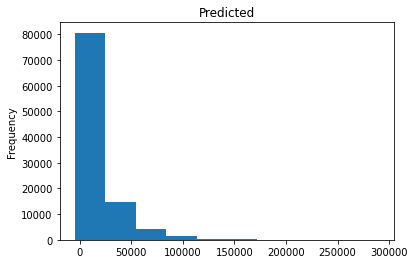

In [371]:
%matplotlib inline
pd.DataFrame(y_pred)[0].plot.hist(title="Predicted")

In [372]:
pd.DataFrame(y_pred)[0].describe()

count   101790.00
mean     16262.70
std      21639.33
min      -4716.73
25%       2719.36
50%       8416.39
75%      20641.71
max     290328.99
Name: 0, dtype: float64

In [373]:
y_valid = not_na_xy[["year0_sales_valid"]]
y_valid.head(4)

,year0_sales_valid
0,36444.00
1,50434.11
2,74930.33
3,28751.57


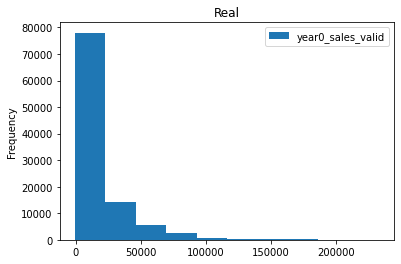

In [374]:
%matplotlib inline
y_valid.plot.hist(title="Real")

In [375]:
reg.score(x_valid[fitting_cols], y_valid)

0.9505074111697642

#### Evaluation

In [376]:
# store_colname="Store"
# dept_colname="Dept"
# date_colname="Date"

# display(x_valid[[store_colname, dept_colname, date_colname]])

# submission_df = pd.DataFrame()
# submission_df["Id"] = x_valid[store_colname].astype(str) + "_" + x_valid[dept_colname].astype(str) + "_" + x_valid[date_colname].astype(str)

# submission_df["Id"]

In [377]:
subm = evaluation.build_submission_df(test_df=x_valid, 
                                      target_predicted=y_pred)

In [378]:
subm.sample(5)

,Weekly_Sales
Id,
12.0_85.0_2010-08-06,2677.39
43.0_90.0_2010-10-08,70538.07
24.0_80.0_2010-05-28,30889.58
12.0_12.0_2010-02-12,5395.29
36.0_8.0_2010-07-16,3261.95


In [379]:
x_valid = x_valid.rename({"year0_isholiday_valid": "IsHoliday", "year0_sales_valid": "Weekly_Sales"}, axis=1)
x_valid

,store_dept,wm_date,Store_train,Dept_train,Date_train,year0_train,year0_sales_train,year0_size_train,year0_isholiday_train,year0_fuel_price_train,year0_cpi_train,year0_unempl_train,year0_week_n_train,year0_md1_train,year0_md2_train,year0_md3_train,year0_md4_train,year0_md5_train,year1_train,year1_sales_train,year1_size_train,year1_isholiday_train,year1_fuel_price_train,year1_cpi_train,year1_unempl_train,year1_week_n_train,year1_md1_train,year1_md2_train,year1_md3_train,year1_md4_train,year1_md5_train,Store_valid,Dept_valid,Date_valid,year0_valid,Weekly_Sales,year0_size_valid,IsHoliday,year0_fuel_price_valid,year0_cpi_valid,year0_unempl_valid,year0_week_n_valid,year0_md1_valid,year0_md2_valid,year0_md3_valid,year0_md4_valid,year0_md5_valid,Store,Dept,Date
0,10_1,02/1,10.00,1.00,2010-02-05,0.00,40212.84,126512.00,False,2.96,126.44,9.77,1.00,nan,nan,nan,nan,nan,1.00,36145.83,126512.00,False,3.35,127.72,8.74,1.00,nan,nan,nan,nan,nan,10,1,2012-02-03,2,36444.00,126512,False,3.54,130.35,7.54,1,42468.40,1985.73,174.33,33345.34,5609.77,10.00,1.00,2010-02-05
1,10_1,02/2,10.00,1.00,2010-02-12,0.00,67699.32,126512.00,True,2.83,126.50,9.77,2.00,nan,nan,nan,nan,nan,1.00,52118.42,126512.00,True,3.38,127.86,8.74,2.00,nan,nan,nan,nan,nan,10,1,2012-02-10,2,50434.11,126512,True,3.72,130.38,7.54,2,8414.22,861.38,66.96,6806.11,5723.00,10.00,1.00,2010-02-12
2,10_1,02/3,10.00,1.00,2010-02-19,0.00,49748.33,126512.00,False,2.92,126.53,9.77,3.00,nan,nan,nan,nan,nan,1.00,64020.62,126512.00,False,3.43,128.00,8.74,3.00,nan,nan,nan,nan,nan,10,1,2012-02-17,2,74930.33,126512,False,3.78,130.45,7.54,3,20174.89,8935.08,10.80,6330.02,12821.24,10.00,1.00,2010-02-19
3,10_1,02/4,10.00,1.00,2010-02-26,0.00,33601.22,126512.00,False,2.83,126.55,9.77,4.00,nan,nan,nan,nan,nan,1.00,27273.94,126512.00,False,3.40,128.13,8.74,4.00,nan,nan,nan,nan,nan,10,1,2012-02-24,2,28751.57,126512,False,3.95,130.55,7.54,4,13929.09,4614.67,nan,596.50,6528.31,10.00,1.00,2010-02-26
4,10_1,03/1,10.00,1.00,2010-03-05,0.00,36572.44,126512.00,False,2.88,126.58,9.77,1.00,nan,nan,nan,nan,nan,1.00,30345.61,126512.00,False,3.67,128.26,8.74,1.00,nan,nan,nan,nan,nan,10,1,2012-03-02,2,30525.88,126512,False,3.88,130.65,7.54,1,22685.06,152.91,48.76,5831.75,2808.95,10.00,1.00,2010-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104605,9_96,09/4,9.00,96.00,2010-09-24,0.00,3714.87,125833.00,False,2.62,215.14,6.44,4.00,nan,nan,nan,nan,nan,1.00,3145.13,125833.00,False,3.47,219.97,6.40,4.00,nan,nan,nan,nan,nan,9,96,2012-09-28,2,3763.21,125833,False,3.67,226.76,5.28,4,1699.68,1.91,0.55,190.38,1819.15,9.00,96.00,2010-09-24
104606,9_96,10/1,9.00,96.00,2010-10-01,0.00,5238.39,125833.00,False,2.60,215.21,6.56,1.00,nan,nan,nan,nan,nan,1.00,4454.78,125833.00,False,3.29,220.66,6.05,1.00,nan,nan,nan,nan,nan,9,96,2012-10-05,2,4306.43,125833,False,3.62,226.97,4.95,1,2657.57,nan,3.01,1107.79,1560.55,9.00,96.00,2010-10-01
104607,9_96,10/2,9.00,96.00,2010-10-08,0.00,4475.24,125833.00,False,2.63,215.29,6.56,2.00,nan,nan,nan,nan,nan,1.00,4116.66,125833.00,False,3.27,220.98,6.05,2.00,nan,nan,nan,nan,nan,9,96,2012-10-12,2,3675.99,125833,False,3.60,227.17,4.95,2,520.41,nan,6.01,nan,2839.84,9.00,96.00,2010-10-08
104608,9_96,10/3,9.00,96.00,2010-10-15,0.00,3045.80,125833.00,False,2.72,215.36,6.56,3.00,nan,nan,nan,nan,nan,1.00,4181.56,125833.00,False,3.35,221.15,6.05,3.00,nan,nan,nan,nan,nan,9,96,2012-10-19,2,3540.05,125833,False,3.59,227.21,4.95,3,545.72,nan,8.00,28.94,3098.87,9.00,96.00,2010-10-15


In [380]:
evaluation.evaluate(subm, x_valid)

2567.0557101496506

In [381]:
fitting_cols

['year0_sales_train',
 'year0_size_train',
 'year0_cpi_train',
 'year0_isholiday_train']

#### Test

In [382]:
test.head()

,Store,Dept,Date,IsHoliday,timestamp,store_dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,datetime,day_n,month_n,year,date_ym,week_n,celsius,wm_date,celsius_diff,pre_holiday,pos_holiday,Type,Size
0,1,1,2012-11-02,False,1351825200.00,1_1,55.32,3.39,6766.44,5147.70,50.82,3639.90,2737.42,223.46,6.57,2012-11-02,2,11,2012,2012-11,1,12.96,11/1,-7.69,False,False,A,151315
1,19,10,2012-11-02,False,1351825200.00,19_10,46.81,3.97,11686.96,18053.48,88.94,5484.50,3833.76,138.62,7.99,2012-11-02,2,11,2012,2012-11,1,8.23,11/1,-5.38,False,False,A,203819
2,16,55,2012-11-02,False,1351825200.00,16_55,38.20,3.60,2826.02,984.41,4.46,274.18,1411.99,199.29,5.85,2012-11-02,2,11,2012,2012-11,1,3.44,11/1,-1.55,False,False,B,57197
3,22,18,2012-11-02,False,1351825200.00,22_18,54.55,3.82,8793.36,10347.53,5.62,7350.89,801.32,142.66,7.54,2012-11-02,2,11,2012,2012-11,1,12.53,11/1,-1.68,False,False,B,119557
4,25,16,2012-11-02,False,1351825200.00,25_16,40.83,3.79,12435.08,16493.02,55.19,1165.36,1144.39,216.16,7.29,2012-11-02,2,11,2012,2012-11,1,4.91,11/1,-8.81,False,False,B,128107


In [383]:
test["Date"].head(1).append(test["Date"].tail(1))

0         2012-11-02
115063    2013-07-26
Name: Date, dtype: object

In [384]:
try:
    dummy_test = pd.read_csv("data/ml_datasets/wm_data_test.csv", sep=";")
except FileNotFoundError:
    test["Weekly_Sales"] = len(test) * [0]
    dummy_test = wm_data(test)
    del test["Weekly_Sales"]
    dummy_test.to_csv("data/ml_datasets/wm_data_test.csv", sep=";", index=False)

In [385]:
dummy_test = process.format_wm_data_colnames(dummy_test, "test")

Total groups:  115064
115064


In [423]:
try:
    wm_data_train_valid = pd.read_csv("data/ml_datasets/wm_data_train_valid.csv", sep=";")
except FileNotFoundError:
    wm_data_train_valid = wm_data(train)
    wm_data_train_valid.to_csv("data/ml_datasets/wm_data_train_valid.csv", sep=";", index=False)

In [424]:
wm_data_train_valid = process.format_wm_data_colnames(wm_data_train_valid, "train")

Total groups:  170730
170730


In [388]:
xy_test = pd.merge(dummy_train, dummy_test, 
                   left_on=["wm_date", "store_dept"], right_on=["wm_date", "store_dept"], 
                   how="right", suffixes=["_train", "_test"])

print("Total groups: ", len(xy_test.drop_duplicates(["wm_date", "store_dept"])))
print(len(xy_test))
xy_test.sample(6)

Total groups:  115064
115064


,store_dept,wm_date,Store_train,Dept_train,Date_train,year0_train,year0_sales_train,year0_size_train,year0_isholiday_train,year0_fuel_price_train,year0_cpi_train,year0_unempl_train,year0_week_n_train,year0_md1_train,year0_md2_train,year0_md3_train,year0_md4_train,year0_md5_train,year1_train,year1_sales_train,year1_size_train,year1_isholiday_train,year1_fuel_price_train,year1_cpi_train,year1_unempl_train,year1_week_n_train,year1_md1_train,year1_md2_train,year1_md3_train,year1_md4_train,year1_md5_train,Store_test,Dept_test,Date_test,year0_test,year0_sales_test,year0_size_test,year0_isholiday_test,year0_fuel_price_test,year0_cpi_test,year0_unempl_test,year0_week_n_test,year0_md1_test,year0_md2_test,year0_md3_test,year0_md4_test,year0_md5_test
3611,11_37,12/2,11.00,37.00,2010-12-10,0.00,3749.78,207499.00,False,2.84,214.77,7.56,2.00,nan,nan,nan,nan,nan,1.00,3674.29,207499.00,False,3.16,222.42,7.20,2.00,4923.89,36.00,525.03,2598.36,8696.45,11,37,2012-12-14,2,0,207499,False,3.17,227.27,6.03,2,2299.38,nan,179.00,11.94,2687.63
113055,43_67,05/5,nan,nan,NaN,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,43,67,2013-05-31,3,0,41062,False,3.47,nan,nan,5,403.31,nan,12.01,nan,2463.06
85348,43_92,01/2,43.00,92.00,2011-01-14,1.00,88020.22,41062.00,False,2.98,203.48,10.40,2.00,nan,nan,nan,nan,nan,2.00,96253.56,41062.00,False,3.26,211.41,9.65,2.00,894.04,209.71,32.36,nan,1191.88,43,92,2013-01-11,3,0,41062,False,3.24,215.49,8.93,2,895.10,829.88,nan,nan,1527.24
57926,31_7,02/3,31.00,7.00,2010-02-19,0.00,15886.41,203750.00,False,2.51,210.95,8.32,3.00,nan,nan,nan,nan,nan,1.00,15944.75,203750.00,False,3.04,212.90,8.03,3.00,nan,nan,nan,nan,nan,31,7,2013-02-15,3,0,203750,False,3.48,223.91,6.24,3,19129.05,2539.21,153.56,3163.22,6374.79
26485,1_71,02/2,1.00,71.00,2010-02-12,0.00,4752.00,151315.00,True,2.55,211.24,8.11,2.00,nan,nan,nan,nan,nan,1.00,3871.94,151315.00,True,3.02,212.94,7.74,2.00,nan,nan,nan,nan,nan,1,71,2013-02-08,3,0,151315,True,3.42,224.24,6.53,2,32355.16,729.80,280.89,20426.61,4671.78
63318,34_25,04/1,34.00,25.00,2010-04-02,0.00,5523.00,158114.00,False,2.74,126.60,9.59,1.00,nan,nan,nan,nan,nan,1.00,6273.31,158114.00,False,3.52,128.72,10.58,1.00,nan,nan,nan,nan,nan,34,25,2013-04-05,3,0,158114,False,3.55,132.65,8.80,1,8593.42,3307.23,517.21,1022.91,2517.62


#### Filling NaN values

In [389]:
test_cols = [fitting_col.replace("0", "1") for fitting_col in fitting_cols]

In [390]:
stats.freq(xy_test["year1_sales_train"].isna())

,freq_absolute,freq_relative
False,101736,88.42%
True,13328,11.58%


In [391]:
stats.freq(xy_test["year0_sales_train"].isna())

,freq_absolute,freq_relative
False,104197,90.56%
True,10867,9.44%


In [392]:
# stats.freq(xy_test["year2_sales_train"].isna())

In [393]:
not_na_xy_test = xy_test[(xy_test["year1_sales_train"].notna()) & 
                         (xy_test["year1_size_train"].notna()) & 
                         (xy_test["year1_cpi_train"].notna())]

In [394]:
na_xy_test = xy_test[~xy_test.index.isin(not_na_xy_test.index)]

In [395]:
len(not_na_xy_test) + len(na_xy_test), len(xy_test)

(115064, 115064)

In [396]:
stats.freq(na_xy_test["store_dept"].isin(dummy_train["store_dept"]))

,freq_absolute,freq_relative
True,13109,98.36%
False,219,1.64%


In [397]:
stats.freq(na_xy_test["Store_test"].isin(not_na_xy_test["Store_train"]))

,freq_absolute,freq_relative
True,13328,100.00%


In [398]:
stats.freq(na_xy_test["Dept_test"].isin(not_na_xy_test["Dept_train"]))

,freq_absolute,freq_relative
True,13271,99.57%
False,57,0.43%


filling

In [399]:
def dummy_fill_dept_median(row, refference_data, fill_colnames):
    dept_data = refference_data[refference_data["Dept_train"] == row["Dept_test"]]
    for fill_colname in fill_colnames:
        row[fill_colname] = dept_data[fill_colname].median()
    return row

def dummy_fill_store_median(row, refference_data, fill_colnames):
    dept_data = refference_data[refference_data["Store_train"] == row["Store_test"]]
    for fill_colname in fill_colnames:
        row[fill_colname] = dept_data[fill_colname].median()
    return row

In [400]:
test_cols

['year1_sales_train',
 'year1_size_train',
 'year1_cpi_train',
 'year1_isholiday_train']

In [410]:
na_xy_test_filled = na_xy_test.apply(lambda row : dummy_fill_store_median(row, not_na_xy_test, test_cols), axis=1)

In [411]:
stats.freq(na_xy_test_filled["year1_sales_train"].isna())

,freq_absolute,freq_relative
False,13328,100.00%


In [412]:
stats.freq(na_xy_test_filled["year1_size_train"].isna())

,freq_absolute,freq_relative
False,13328,100.00%


In [413]:
stats.freq(na_xy_test_filled["year1_cpi_train"].isna())

,freq_absolute,freq_relative
False,13328,100.00%


In [414]:
# na_xy_test_filled = na_xy_test_filled.apply(lambda row : dummy_fill_store_median(row, dummy_train_valid, ["year1_sales_train", "year1_size_train"]), axis=1)

In [415]:
# stats.freq(na_xy_test_filled["year1_sales_train"].isna())

#### Predicting

In [416]:
# not_na_xy_test = xy_test[xy_test["year1_sales_train"].notna()]

In [417]:
x_test = not_na_xy_test.append(na_xy_test_filled)#[["year1_sales_train", "year1_size_train"] + key_colnames + ["IsHoliday_test"]]
x_test.head(4)

,store_dept,wm_date,Store_train,Dept_train,Date_train,year0_train,year0_sales_train,year0_size_train,year0_isholiday_train,year0_fuel_price_train,year0_cpi_train,year0_unempl_train,year0_week_n_train,year0_md1_train,year0_md2_train,year0_md3_train,year0_md4_train,year0_md5_train,year1_train,year1_sales_train,year1_size_train,year1_isholiday_train,year1_fuel_price_train,year1_cpi_train,year1_unempl_train,year1_week_n_train,year1_md1_train,year1_md2_train,year1_md3_train,year1_md4_train,year1_md5_train,Store_test,Dept_test,Date_test,year0_test,year0_sales_test,year0_size_test,year0_isholiday_test,year0_fuel_price_test,year0_cpi_test,year0_unempl_test,year0_week_n_test,year0_md1_test,year0_md2_test,year0_md3_test,year0_md4_test,year0_md5_test
0,10_1,01/1,10.00,1.00,2011-01-07,1.00,26041.71,126512.00,False,3.29,127.19,8.74,1.00,nan,nan,nan,nan,nan,2.00,28520.49,126512.00,False,3.44,130.16,7.54,1.00,7737.75,38456.09,39.72,305.20,5408.08,10,1,2013-01-04,3,0,126512,False,3.34,131.85,6.90,1,2912.56,47440.51,8.96,102.02,3591.51
1,10_1,01/2,10.00,1.00,2011-01-14,1.00,27859.44,126512.00,False,3.31,127.30,8.74,2.00,nan,nan,nan,nan,nan,2.00,30107.31,126512.00,False,3.48,130.24,7.54,2.00,5203.77,14424.42,1.38,597.55,5659.57,10,1,2013-01-11,3,0,126512,False,3.54,131.96,6.90,2,5044.10,12418.39,4.14,1338.89,2169.24
2,10_1,01/3,10.00,1.00,2011-01-21,1.00,30911.87,126512.00,False,3.34,127.44,8.74,3.00,nan,nan,nan,nan,nan,2.00,31180.23,126512.00,False,3.66,130.28,7.54,3.00,2972.31,3286.44,1.00,644.03,5331.52,10,1,2013-01-18,3,0,126512,False,3.54,132.03,6.90,3,2985.32,2043.00,2.74,2.88,2275.88
3,10_1,01/4,10.00,1.00,2011-01-28,1.00,29890.73,126512.00,False,3.23,127.58,8.74,4.00,nan,nan,nan,nan,nan,2.00,32559.13,126512.00,False,3.67,130.31,7.54,4.00,3242.59,1646.86,nan,45.80,1691.83,10,1,2013-01-25,3,0,126512,False,3.56,132.09,6.90,4,2255.78,1790.75,1.70,693.48,1280.81


In [418]:
y_test_pred = reg.predict(x_test[test_cols])
y_test_pred

array([[28109.62256257],
       [29675.15229691],
       [30733.60717004],
       ...,
       [ 5144.90325412],
       [ 5144.90325412],
       [ 5144.90325412]])

In [419]:
subm = evaluation.build_submission_df(test_df=x_test, 
                                      target_predicted=y_test_pred,
                                      store_colname="Store_test", 
                                      dept_colname="Dept_test", 
                                      date_colname="Date_test")

In [420]:
subm["Weekly_Sales"] = subm["Weekly_Sales"].apply(lambda ws : round(ws, 2))

In [421]:
subm.reset_index().to_csv("data/submissions/subm6.csv", index=False)

In [422]:
test_cols

['year1_sales_train',
 'year1_size_train',
 'year1_cpi_train',
 'year1_isholiday_train']